##### [12: 腐蚀与膨胀](https://codec.wang/docs/opencv/basic/erode-and-dilate)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 使用文泉驿字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

(<Axes: >, <matplotlib.image.AxesImage at 0x7f2be5da6a80>)

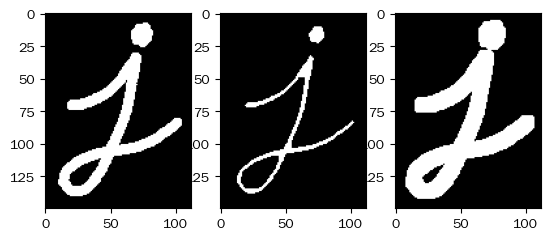

In [4]:
img = cv2.imread('images/j.bmp',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel) # 腐蚀
dilation = cv2.dilate(img,kernel) # 膨胀

# plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))
plt.subplot(132),plt.imshow(cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB))
plt.subplot(133),plt.imshow(cv2.cvtColor(dilation,cv2.COLOR_GRAY2RGB))

##### 开/闭运算
先腐蚀后膨胀叫开运算（因为先腐蚀会分开物体，这样容易记住），其作用是：分离物体，消除小区域。这类形态学操作用cv2.morphologyEx()函数实现：

(<Axes: title={'center': '闭运算'}>,
 Text(0.5, 1.0, '闭运算'))

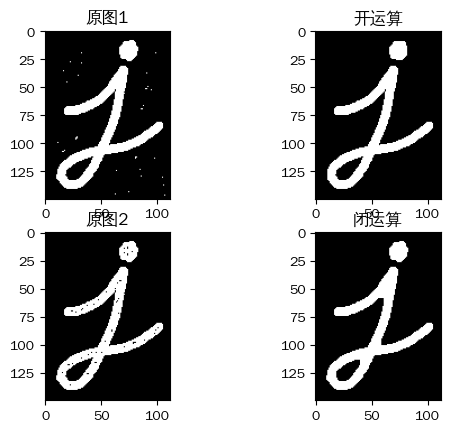

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)) # 定义结构元素

img1 = cv2.imread('images/j_noise_out.bmp',0)
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel) # 开运算
img2 = cv2.imread('images/j_noise_in.bmp',0)
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel) # 闭运算

# plt.figure(figsize=(12,8))
plt.subplot(221),plt.imshow(cv2.cvtColor(img1,cv2.COLOR_GRAY2RGB)),plt.title('原图1')
plt.subplot(222),plt.imshow(cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)),plt.title('开运算')
plt.subplot(223),plt.imshow(cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB)),plt.title('原图2')
plt.subplot(224),plt.imshow(cv2.cvtColor(closing,cv2.COLOR_GRAY2RGB)),plt.title('闭运算')

###### 其他形态学操作

(<Axes: title={'center': '黑帽'}>,
 Text(0.5, 1.0, '黑帽'))

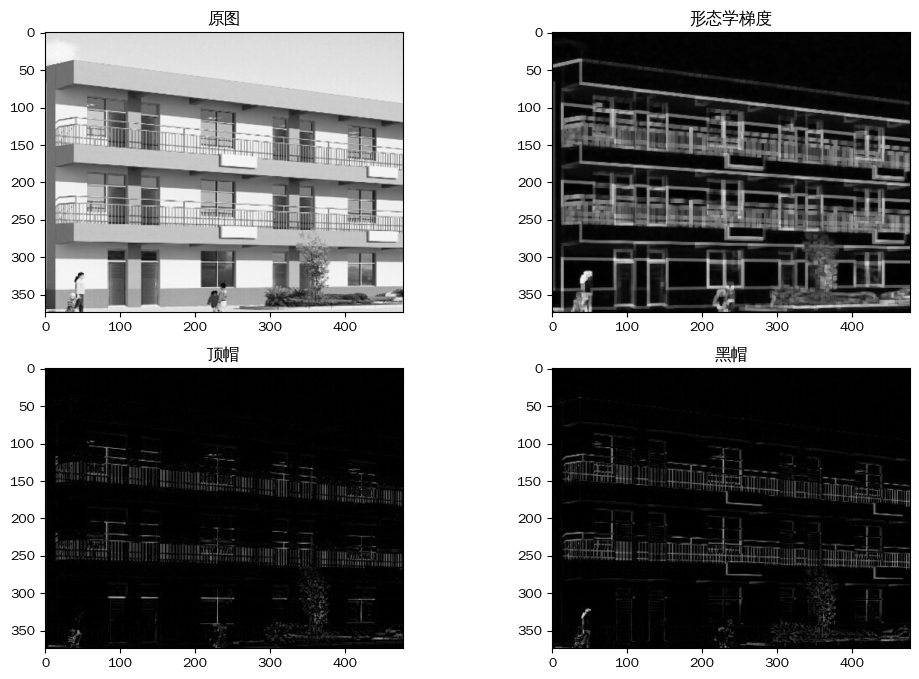

In [9]:
img = cv2.imread('images/school.bmp', 0)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel) # 形态学梯度：膨胀图减去腐蚀图，dilation - erosion，这样会得到物体的轮廓：
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel) # 顶帽：原图减去开运算后的图：src - opening
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel) # 黑帽：闭运算后的图减去原图：closing - src

plt.figure(figsize=(12,8))
plt.subplot(221),plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)),plt.title('原图')
plt.subplot(222),plt.imshow(cv2.cvtColor(gradient ,cv2.COLOR_GRAY2RGB)),plt.title('形态学梯度')
plt.subplot(223),plt.imshow(cv2.cvtColor(tophat ,cv2.COLOR_GRAY2RGB)),plt.title('顶帽')
plt.subplot(224),plt.imshow(cv2.cvtColor(blackhat ,cv2.COLOR_GRAY2RGB)),plt.title('黑帽')